In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from loguru import logger
import numpy as np
import pandas as pd

from exonamd.run import *
from exonamd.plot import pop_plot, simple_plot
from exonamd.solve import solve_namd_mc

from pathlib import Path

In [3]:
file_path = (
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250814.csv"
)

df_exo = pd.read_csv(file_path)

df_interp = interp_db(
    df=df_exo, out_path=Path(file_path).parent / "custom_db_20250814_interp.csv"
)

2025-09-10 10:13:18.022 | INFO     | exonamd.run:interp_db:173 - Thinning down the data with nanmedian
2025-09-10 10:13:18.024 | WARNING  | exonamd.run:interp_db:176 - NaT values in rowupdate: 55
/home/ariel/andrea.bocchieri/.local/lib/python3.10/site-packages/swifter/swifter.py:87: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  warnings.warn(
2025-09-10 10:13:18.051 | INFO     | exonamd.run:interp_db:185 - Data thinned down
2025-09-10 10:13:18.052 | INFO     | exonamd.run:interp_db:187 - Checking for duplicates
2025-09-10 10:13:18.057 | INFO     | exonamd.run:interp_db:195 - No duplicates found
2025-09-10 10:13:18.058 | INFO     | exonamd.run:interp_db:197 - Instantiating the flags
2025-09-10 10:13:18.059 | INFO     | exonamd.run:interp_db:199 - Flags instantiated
2025-09-10 10:13:18.060 | INFO     | exonamd.run:interp_db:201 - Interpolating missing eccentrici

Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-09-10 10:13:18.136 | INFO     | exonamd.run:interp_db:210 - Values interpolated
2025-09-10 10:13:18.138 | INFO     | exonamd.run:interp_db:212 - Interpolating missing planetary mass values


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-09-10 10:13:19.265 | INFO     | exonamd.run:interp_db:221 - Values interpolated
2025-09-10 10:13:19.267 | DEBUG    | exonamd.run:interp_db:223 - Dropping columns that are no longer needed
2025-09-10 10:13:19.269 | DEBUG    | exonamd.run:interp_db:225 - Columns dropped
2025-09-10 10:13:19.270 | INFO     | exonamd.run:interp_db:227 - Removing systems where at least one planet has no mass or semi-major axis
2025-09-10 10:13:19.289 | INFO     | exonamd.run:interp_db:236 - Removing 0 systems: []
2025-09-10 10:13:19.290 | INFO     | exonamd.run:interp_db:238 - Systems removed
2025-09-10 10:13:19.291 | INFO     | exonamd.run:interp_db:240 - Interpolating missing values in inclinations


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-09-10 10:13:19.430 | INFO     | exonamd.run:interp_db:249 - Values interpolated
2025-09-10 10:13:19.432 | INFO     | exonamd.run:interp_db:251 - Interpolating missing values in semi-major axis uncertainties


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-09-10 10:13:19.478 | INFO     | exonamd.run:interp_db:259 - Values interpolated
2025-09-10 10:13:19.480 | INFO     | exonamd.run:interp_db:262 - Computing the relative inclinations


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-09-10 10:13:19.626 | INFO     | exonamd.run:interp_db:270 - Values computed
2025-09-10 10:13:19.627 | INFO     | exonamd.run:interp_db:272 - Interpolating missing values in true obliquity


Pandas Apply:   0%|          | 0/54 [00:00<?, ?it/s]

2025-09-10 10:13:19.822 | INFO     | exonamd.run:interp_db:281 - Values interpolated
2025-09-10 10:13:19.824 | INFO     | exonamd.run:interp_db:284 - Storing the curated+interpolated database
2025-09-10 10:13:19.831 | INFO     | exonamd.run:interp_db:289 - Database stored at /home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250814_interp.csv


In [4]:
# select only the hostnames for which the flag is "0" for all the planets
# df_interp.groupby("hostname").filter(lambda x: all(x["flag"].isin(["0"]))).hostname.unique()
df_interp.groupby("hostname").filter(
    lambda g: not g["flag"].str.contains("5").any()
)[["hostname", "pl_name", "flag"]]

,hostname,pl_name,flag
53,AU Mic,AU Mic,0
44,HD 118203,HD 118203b,0
45,HD 118203,HD 118203c,0
30,K2-290,K2-290 b,02+-
31,K2-290,K2-290 c,0
32,Kepler-462,Kepler-462 b,0
33,Kepler-462,Kepler-462 c,02+-
23,Kepler-56,Kepler-56b,0
24,Kepler-56,Kepler-56c,0
51,TOI-421,TOI-421b,0


In [5]:
df_interp.groupby("hostname").filter(
    lambda g: not g["flag"].str.contains("5").any()
).hostname.unique()

array(['AU Mic', 'HD 118203', 'K2-290', 'Kepler-462', 'Kepler-56',
       'TOI-421', 'TOI-942'], dtype=object)

In [6]:
file_path = (
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250814.csv"
)

df_exo = pd.read_csv(file_path)

# load /home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20241017e.csv as well
# and concat the databases

# df_ss = pd.read_csv(
#     "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20241017e.csv"
# )
# # take only the systems with hostname equal to "SSE"
# df_ss = df_ss[df_ss.hostname.isin(["SSE"])]

df_fake = pd.read_csv(
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250811_fakes.csv"
)
# take only those where the hostname ends with one or multiple "x"
# df_fake = df_fake[df_fake.hostname.str.endswith("x")]

# df_exo = pd.concat([df_exo, df_ss, df_fake], ignore_index=True)
df_exo = pd.concat([df_exo, df_fake], ignore_index=True)

print(df_exo.hostname.unique())
print(df_exo.hostname.nunique())

print(df_exo.groupby("sy_pnum").hostname.nunique())

['WASP-84' 'TOI-1136' 'TOI-5398' 'WASP-47' 'TOI-2076' 'TOI-942' 'HD 3167'
 'Kepler-56' 'WASP-148' 'TOI-451' 'K2-290' 'Kepler-462' 'SS' 'TOI-2202'
 'HD 118203' 'HIP 41378' 'TOI-421' 'AU Mic' '55 Cncx' 'GJ 876x'
 'HD 110067x' 'HD 191939x' 'KOI-351x' 'TOI-942x' 'TOI-942xx' 'TOI-942xxx'
 'TRAPPIST-1x' 'SSE' 'SSEn']
29
sy_pnum
2    13
3     3
4     3
5     2
6     3
7     1
8     4
Name: hostname, dtype: int64


In [7]:
df_interp = interp_db(
    df=df_exo, out_path=Path(file_path).parent / "custom_db_20250811_interp_plus_fakes.csv"
)

2025-09-10 10:13:20.551 | INFO     | exonamd.run:interp_db:173 - Thinning down the data with nanmedian
2025-09-10 10:13:20.554 | WARNING  | exonamd.run:interp_db:176 - NaT values in rowupdate: 83
/home/ariel/andrea.bocchieri/.local/lib/python3.10/site-packages/swifter/swifter.py:87: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  warnings.warn(
2025-09-10 10:13:20.585 | INFO     | exonamd.run:interp_db:185 - Data thinned down
2025-09-10 10:13:20.586 | INFO     | exonamd.run:interp_db:187 - Checking for duplicates
2025-09-10 10:13:20.592 | INFO     | exonamd.run:interp_db:195 - No duplicates found
2025-09-10 10:13:20.592 | INFO     | exonamd.run:interp_db:197 - Instantiating the flags
2025-09-10 10:13:20.594 | INFO     | exonamd.run:interp_db:199 - Flags instantiated
2025-09-10 10:13:20.595 | INFO     | exonamd.run:interp_db:201 - Interpolating missing eccentrici

Pandas Apply:   0%|          | 0/112 [00:00<?, ?it/s]

2025-09-10 10:13:20.669 | INFO     | exonamd.run:interp_db:210 - Values interpolated
2025-09-10 10:13:20.671 | INFO     | exonamd.run:interp_db:212 - Interpolating missing planetary mass values


Pandas Apply:   0%|          | 0/112 [00:00<?, ?it/s]

2025-09-10 10:13:22.333 | INFO     | exonamd.run:interp_db:221 - Values interpolated
2025-09-10 10:13:22.335 | DEBUG    | exonamd.run:interp_db:223 - Dropping columns that are no longer needed
2025-09-10 10:13:22.337 | DEBUG    | exonamd.run:interp_db:225 - Columns dropped
2025-09-10 10:13:22.338 | INFO     | exonamd.run:interp_db:227 - Removing systems where at least one planet has no mass or semi-major axis
2025-09-10 10:13:22.366 | INFO     | exonamd.run:interp_db:236 - Removing 1 systems: ['KOI-351x']
2025-09-10 10:13:22.368 | INFO     | exonamd.run:interp_db:238 - Systems removed
2025-09-10 10:13:22.369 | INFO     | exonamd.run:interp_db:240 - Interpolating missing values in inclinations


Pandas Apply:   0%|          | 0/104 [00:00<?, ?it/s]

2025-09-10 10:13:22.636 | INFO     | exonamd.run:interp_db:249 - Values interpolated
2025-09-10 10:13:22.638 | INFO     | exonamd.run:interp_db:251 - Interpolating missing values in semi-major axis uncertainties


Pandas Apply:   0%|          | 0/104 [00:00<?, ?it/s]

2025-09-10 10:13:22.707 | INFO     | exonamd.run:interp_db:259 - Values interpolated
2025-09-10 10:13:22.709 | INFO     | exonamd.run:interp_db:262 - Computing the relative inclinations


Pandas Apply:   0%|          | 0/104 [00:00<?, ?it/s]

2025-09-10 10:13:22.977 | INFO     | exonamd.run:interp_db:270 - Values computed
2025-09-10 10:13:22.978 | INFO     | exonamd.run:interp_db:272 - Interpolating missing values in true obliquity


Pandas Apply:   0%|          | 0/104 [00:00<?, ?it/s]

2025-09-10 10:13:23.343 | INFO     | exonamd.run:interp_db:281 - Values interpolated
2025-09-10 10:13:23.346 | INFO     | exonamd.run:interp_db:284 - Storing the curated+interpolated database
2025-09-10 10:13:23.352 | INFO     | exonamd.run:interp_db:289 - Database stored at /home/ariel/andrea.bocchieri/DATA/ExoNAMD/exonamd/data/custom_db_20250811_interp_plus_fakes.csv


2025-09-10 10:13:23.490 | DEBUG    | exonamd.run:calc_namd:334 - Dropping columns that are no longer needed
2025-09-10 10:13:23.493 | DEBUG    | exonamd.run:calc_namd:336 - Columns dropped
2025-09-10 10:13:23.494 | INFO     | exonamd.run:calc_namd:345 - Computing the relative NAMD


2025-09-10 10:13:23.592 | INFO     | exonamd.run:calc_namd:353 - Relative NAMD computed
2025-09-10 10:13:23.594 | INFO     | exonamd.run:calc_namd:356 - Computing the absolute NAMD
2025-09-10 10:13:23.705 | INFO     | exonamd.run:calc_namd:364 - Absolute NAMD computed
/home/ariel/andrea.bocchieri/.local/lib/python3.10/site-packages/swifter/swifter.py:87: UserWarning: This pandas object has duplicate indices, and swifter may not be able to improve performance. Consider resetting the indices with `df.reset_index(drop=True)`.
  warnings.warn(
2025-09-10 10:13:23.806 | INFO     | exonamd.run:calc_namd:444 - Computing the Monte Carlo relative NAMD
2025-09-10 10:13:29.629 | INFO     | exonamd.run:calc_namd:455 - Relative NAMD computed
2025-09-10 10:13:29.634 | INFO     | exonamd.run:calc_namd:458 - Computing the Monte Carlo absolute NAMD
2025-09-10 10:13:35.196 | INFO     | exonamd.run:calc_namd:469 - Absolute NAMD computed
/home/ariel/andrea.bocchieri/.local/lib/python3.10/site-packages/swi

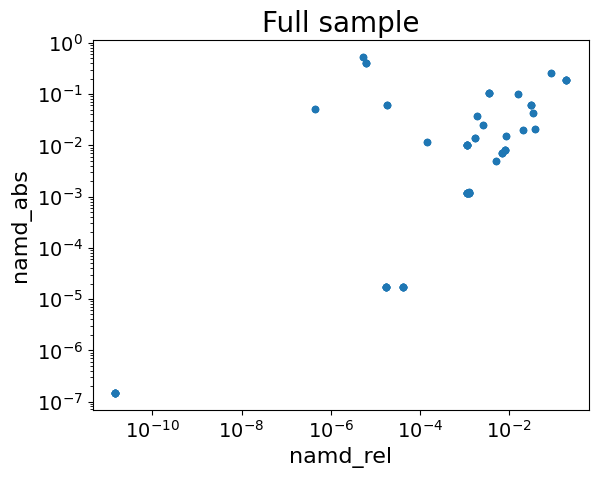

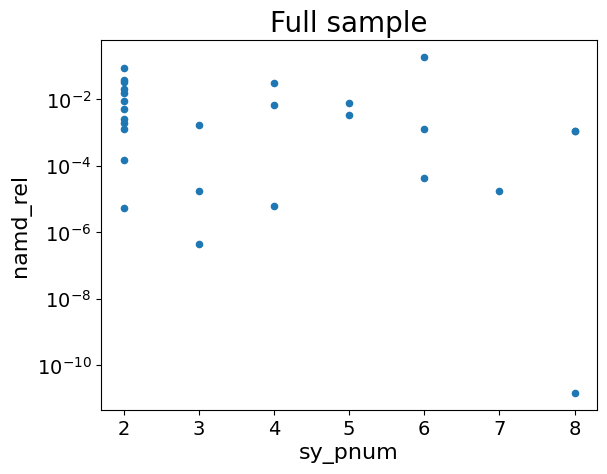

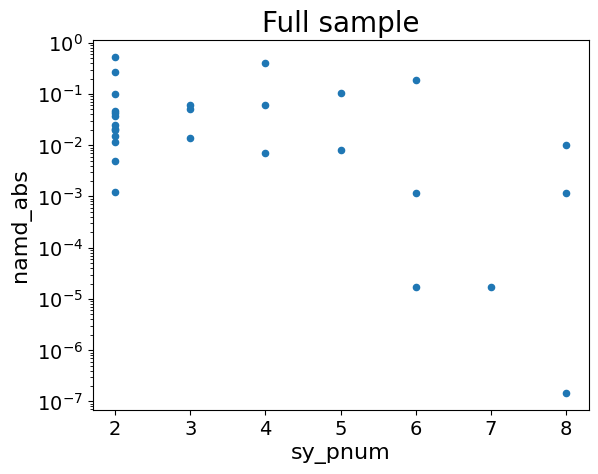

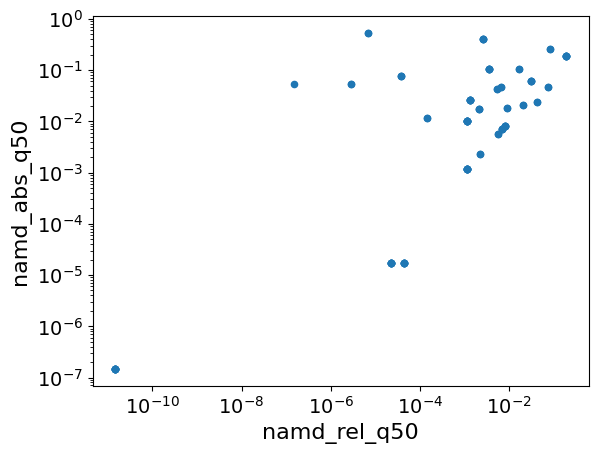

In [8]:
df_namd = calc_namd(
    df=df_interp,
    save=False,
    plot=True,
    core=False,
    filt=None,
    # which=["rel"],
    # which=["abs"],
    which=["rel", "abs"],
    threshold=100,
    # use_trunc_normal=False,
    use_trunc_normal=True,
    Npt=int(1e5),
)

In [9]:
mask = df_namd.hostname == "SS"
cols_rel = ["namd_rel", "namd_rel_mc", "namd_rel_q16", "namd_rel_q50", "namd_rel_q84"]
cols_abs = ["namd_abs", "namd_abs_mc", "namd_abs_q16", "namd_abs_q50", "namd_abs_q84"]

df_namd.loc[mask, cols_rel] = df_namd.loc[mask, cols_abs].to_numpy()

In [10]:
df_namd[df_namd.hostname == "SS"][["namd_rel", "namd_rel_mc", "namd_rel_q16", "namd_rel_q50", "namd_rel_q84"]]

,namd_rel,namd_rel_mc,namd_rel_q16,namd_rel_q50,namd_rel_q84
34,0.001157,NaN,0.001157,0.001157,0.001157
35,0.001157,NaN,0.001157,0.001157,0.001157
36,0.001157,NaN,0.001157,0.001157,0.001157
37,0.001157,NaN,0.001157,0.001157,0.001157
38,0.001157,NaN,0.001157,0.001157,0.001157
39,0.001157,NaN,0.001157,0.001157,0.001157
40,0.001157,NaN,0.001157,0.001157,0.001157
41,0.001157,NaN,0.001157,0.001157,0.001157


In [11]:
df_namd[df_namd.hostname == "SS"][["namd_abs", "namd_abs_mc", "namd_abs_q16", "namd_abs_q50", "namd_abs_q84"]]


,namd_abs,namd_abs_mc,namd_abs_q16,namd_abs_q50,namd_abs_q84
34,0.001157,NaN,0.001157,0.001157,0.001157
35,0.001157,NaN,0.001157,0.001157,0.001157
36,0.001157,NaN,0.001157,0.001157,0.001157
37,0.001157,NaN,0.001157,0.001157,0.001157
38,0.001157,NaN,0.001157,0.001157,0.001157
39,0.001157,NaN,0.001157,0.001157,0.001157
40,0.001157,NaN,0.001157,0.001157,0.001157
41,0.001157,NaN,0.001157,0.001157,0.001157


In [12]:
df_namd[~df_namd.hostname.isin(df_fake.hostname.unique())].hostname.nunique()

18

2025-09-10 10:13:38.270 | INFO     | __main__:<module>:4 - Plotting the absolute NAMD vs. multiplicity


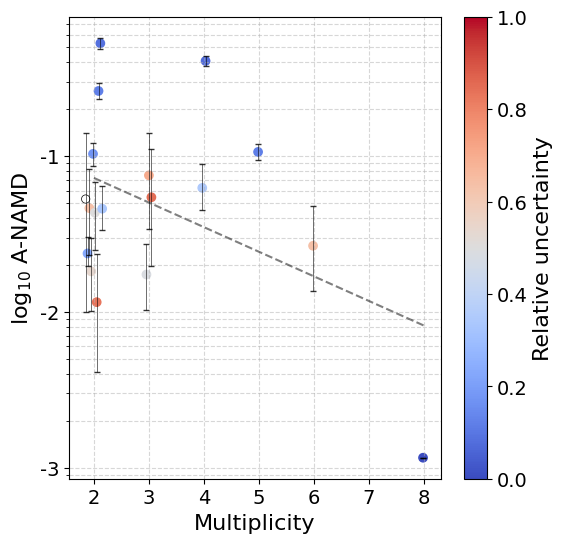

2025-09-10 10:13:39.007 | INFO     | __main__:<module>:18 - Plot done


In [13]:
# for this figure we need to define df_namd_ without systems with hostname in df_fake
df_namd_ = df_namd[~df_namd.hostname.isin(df_fake.hostname.unique())]

logger.info("Plotting the absolute NAMD vs. multiplicity")
pop_plot(
    df=df_namd_.groupby("hostname").apply(
        lambda g: g.select_dtypes(exclude=["object"]).mean(),
        # include_groups=False,
    ),
    kind="abs",
    # title="Core planets",
    which="namd",
    yscale="log",
    out_path="/home/ariel/andrea.bocchieri/DATA/ExoNAMD/notebook/plots/exo_namd_abs_paper.pdf",
    replace_nan=False,
    xoffs=0.15,
)
logger.info("Plot done")

In [14]:
print(df_namd_.hostname.nunique())
print(df_namd_.groupby("sy_pnum").hostname.nunique())

18
sy_pnum
2    10
3     3
4     2
5     1
6     1
8     1
Name: hostname, dtype: int64


In [15]:
df_namd.hostname.unique()

array(['55 Cncx', 'AU Mic', 'GJ 876x', 'HD 110067x', 'HD 118203',
       'HD 191939x', 'HD 3167', 'HIP 41378', 'K2-290', 'Kepler-462',
       'Kepler-56', 'SS', 'SSE', 'SSEn', 'TOI-1136', 'TOI-2076',
       'TOI-2202', 'TOI-421', 'TOI-451', 'TOI-5398', 'TOI-942',
       'TOI-942x', 'TOI-942xx', 'TOI-942xxx', 'TRAPPIST-1x', 'WASP-148',
       'WASP-47', 'WASP-84'], dtype=object)

In [16]:
df_namd_plot = df_namd_.groupby("hostname")[
    [
        "namd_rel",
        "namd_abs",
        "namd_rel_q16",
        "namd_rel_q50",
        "namd_rel_q84",
        "namd_abs_q16",
        "namd_abs_q50",
        "namd_abs_q84",
    ]
].apply(lambda g: g.select_dtypes(exclude=["object"]).mean())

df_namd_fake = (
    df_namd[df_namd.hostname.isin(df_fake.hostname.unique())]
    .groupby("hostname")[
        [
            "namd_rel",
            "namd_abs",
            "namd_rel_q16",
            "namd_rel_q50",
            "namd_rel_q84",
            "namd_abs_q16",
            "namd_abs_q50",
            "namd_abs_q84",
        ]
    ]
    .apply(lambda g: g.select_dtypes(exclude=["object"]).mean())
)

print(len(df_namd_plot), len(df_namd_fake))

18 10


In [17]:
# df_namd_plot
# print with 5 decimals
df_namd_plot.round(6)

,namd_rel,namd_abs,namd_rel_q16,namd_rel_q50,namd_rel_q84,namd_abs_q16,namd_abs_q50,namd_abs_q84
hostname,,,,,,,,
AU Mic,0.000000,0.046231,0.000000,0.000000,0.000001,0.009949,0.052979,0.140499
HD 118203,0.033952,0.041910,0.039275,0.074132,0.196471,0.033358,0.045931,0.064122
HD 3167,0.000006,0.405599,0.000769,0.002651,0.006932,0.378353,0.407978,0.438415
HIP 41378,0.003475,0.104309,0.001462,0.003623,0.008475,0.094046,0.106279,0.119723
K2-290,0.000005,0.529438,0.000003,0.000007,0.000014,0.485683,0.529696,0.575119
Kepler-462,0.086552,0.263796,0.060939,0.084429,0.108902,0.231967,0.261716,0.294704
Kepler-56,0.000000,0.051676,0.000001,0.000003,0.000007,0.019718,0.054385,0.111736
SS,0.001157,0.001157,0.001157,0.001157,0.001157,0.001157,0.001157,0.001157
TOI-1136,0.001265,0.001188,0.001115,0.001346,0.001621,0.013533,0.026543,0.047504


In [18]:
df_namd_fake

,namd_rel,namd_abs,namd_rel_q16,namd_rel_q50,namd_rel_q84,namd_abs_q16,namd_abs_q50,namd_abs_q84
hostname,,,,,,,,
55 Cncx,8.035724e-03,8.035726e-03,5.866919e-03,8.109613e-03,1.074536e-02,5.777153e-03,8.049496e-03,1.070314e-02
GJ 876x,6.951919e-03,6.951921e-03,6.885058e-03,6.956952e-03,7.030219e-03,6.884715e-03,6.957144e-03,7.030970e-03
HD 110067x,4.233427e-05,1.709887e-05,3.819562e-05,4.353192e-05,4.988517e-05,1.709887e-05,1.709887e-05,1.709887e-05
HD 191939x,1.897625e-01,1.897618e-01,1.897690e-01,1.897937e-01,1.898794e-01,1.897611e-01,1.897619e-01,1.897628e-01
SSE,1.141626e-03,1.012178e-02,1.141626e-03,1.141626e-03,1.141626e-03,1.012178e-02,1.012178e-02,1.012178e-02
SSEn,1.458319e-11,1.465562e-07,1.458316e-11,1.458319e-11,1.458322e-11,1.465562e-07,1.465562e-07,1.465562e-07
TOI-942x,2.020410e-02,2.020410e-02,1.373361e-02,2.070701e-02,2.930433e-02,1.371035e-02,2.068745e-02,2.927814e-02
TOI-942xx,5.012563e-03,5.012563e-03,2.578821e-03,5.696080e-03,1.036769e-02,2.580043e-03,5.684882e-03,1.025943e-02
TOI-942xxx,1.250782e-03,1.250782e-03,7.438486e-04,2.260621e-03,5.066936e-03,7.354836e-04,2.277561e-03,5.093778e-03


0


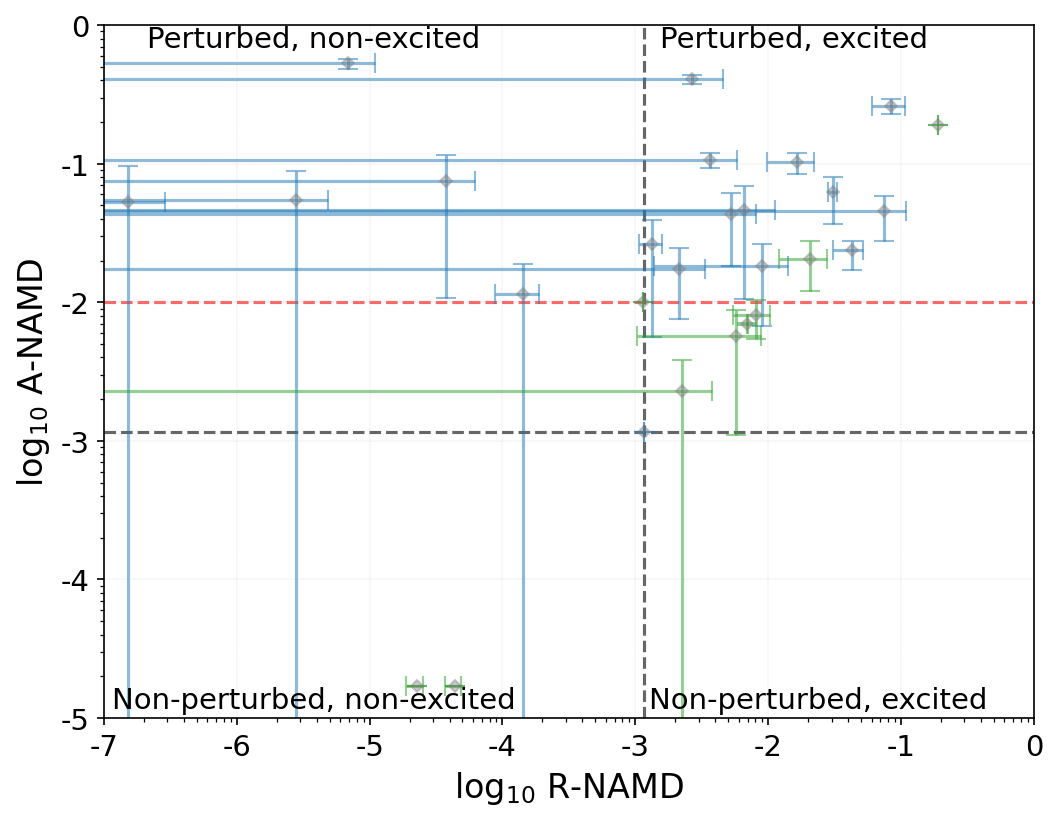

In [21]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 6), dpi=150)

plt.yscale("log")
plt.xscale("log")
plt.xlabel(rf"log$_{{10}}$ R-NAMD")
plt.ylabel(rf"log$_{{10}}$ A-NAMD")

ax = plt.gca()
for df_p, color in zip([df_namd_plot, df_namd_fake], ["C0", "C2"]):

    ax.plot(
        df_p["namd_rel_q50"],
        df_p["namd_abs_q50"],
        linestyle="none",
        marker="D",
        markersize=4,
        alpha=0.4,
        zorder=3,  # above error bars
        color="gray",
    )

    ax.errorbar(
        x=df_p["namd_rel_q50"],
        y=df_p["namd_abs_q50"],
        xerr=(
            df_p["namd_rel_q84"] - df_p["namd_rel_q50"],
            df_p["namd_rel_q50"] - df_p["namd_rel_q16"],
        ),
        yerr=(
            df_p["namd_abs_q84"] - df_p["namd_abs_q50"],
            df_p["namd_abs_q50"] - df_p["namd_abs_q16"],
        ),
        fmt="none",      # draw only bars
        capsize=5,
        alpha=0.5,
        zorder=1,        # under the diamonds
        color=color,
    )

missing_mc = df_namd_plot[
    np.logical_or(
        df_namd_plot["namd_abs_q50"].isna(), df_namd_plot["namd_rel_q50"].isna()
    )
]
print(len(missing_mc))

plt.plot(
    missing_mc["namd_rel"],
    missing_mc["namd_abs"],
    "o",
    color="k",
    alpha=0.5,
    markersize=3,
)

ymin = 1e-5
ymax = 1
xmin = 1e-7
xmax = 1

# xmin = xmax = ymin = ymax = None

plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
# plt.vlines(1.3e-3, *plt.ylim(), colors=["k"], linestyles=["--"])
# plt.hlines(1.3e-3, *plt.xlim(), colors=["k"], linestyles=["--"])

plt.vlines(
    df_namd_plot.loc["SS"]["namd_rel"],
    *plt.ylim(),
    colors=["k"],
    linestyles=["--"],
    alpha=0.6,
    zorder=0
)
plt.hlines(
    df_namd_plot.loc["SS"]["namd_abs"],
    *plt.xlim(),
    colors=["k"],
    linestyles=["--"],
    alpha=0.6,
    zorder=0
)

# plt.vlines(df_namd_ss.loc["SSE"]["namd_rel"], *plt.ylim(), colors=["b"], linestyles=["--"], alpha=0.3, zorder=0)
plt.hlines(
    df_namd_fake.loc["SSE"]["namd_abs"],
    *plt.xlim(),
    colors=["r"],
    linestyles=["--"],
    alpha=0.6,
    zorder=0
)

fig.text(0.3, 0.865, "Perturbed, non-excited", ha="center", va="center")
fig.text(0.7, 0.865, "Perturbed, excited", ha="center", va="center")

fig.text(0.3, 0.13, "Non-perturbed, non-excited", ha="center", va="center")
fig.text(0.72, 0.13, "Non-perturbed, excited", ha="center", va="center")
plt.grid(which="major", lw=0.15, ls="--", alpha=0.8)

from matplotlib.ticker import LogLocator, FuncFormatter, NullFormatter
ax.xaxis.set_major_locator(LogLocator(base=10))
ax.xaxis.set_major_formatter(
    FuncFormatter(lambda y, pos: f"{int(np.log10(y))}" if y > 0 else "")
)
ax.xaxis.set_minor_formatter(NullFormatter())
ax.yaxis.set_major_locator(LogLocator(base=10))
ax.yaxis.set_major_formatter(
    FuncFormatter(lambda y, pos: f"{int(np.log10(y))}" if y > 0 else "")
)
ax.yaxis.set_minor_formatter(NullFormatter())

plt.savefig(
    "/home/ariel/andrea.bocchieri/DATA/ExoNAMD/notebook/plots/four_quadrants_plot_paper.pdf",
    bbox_inches="tight",
    dpi=300,
)
plt.show()

In [26]:
df_namd_plot.loc["SS"][["namd_rel", "namd_abs"]], df_namd_fake.loc["SSE"]["namd_abs"]

(namd_rel    0.001157
 namd_abs    0.001157
 Name: SS, dtype: float64,
 0.010121775638911982)

In [19]:
# sort df_namd_fake by the namd_rel_q50
df_namd_fake.sort_values("namd_rel_q50")

,namd_rel,namd_abs,namd_rel_q16,namd_rel_q50,namd_rel_q84,namd_abs_q16,namd_abs_q50,namd_abs_q84
hostname,,,,,,,,
SSEn,1.458319e-11,1.465562e-07,1.458317e-11,1.458319e-11,1.458322e-11,1.465562e-07,1.465562e-07,1.465562e-07
TRAPPIST-1x,1.754423e-05,1.709887e-05,2.014984e-05,2.261152e-05,2.633491e-05,1.709887e-05,1.709887e-05,1.709887e-05
HD 110067x,4.233427e-05,1.709887e-05,3.820725e-05,4.350199e-05,4.983980e-05,1.709887e-05,1.709887e-05,1.709887e-05
SSE,1.141626e-03,1.012178e-02,1.141626e-03,1.141626e-03,1.141626e-03,1.012178e-02,1.012178e-02,1.012178e-02
TOI-942xxx,1.250782e-03,1.250782e-03,7.334450e-04,2.245756e-03,5.054171e-03,7.447844e-04,2.240711e-03,5.095775e-03
TOI-942xx,5.012563e-03,5.012563e-03,2.568894e-03,5.657845e-03,1.032694e-02,2.586403e-03,5.668782e-03,1.031599e-02
GJ 876x,6.951919e-03,6.951921e-03,6.884593e-03,6.957213e-03,7.030614e-03,6.885683e-03,6.957320e-03,7.030352e-03
55 Cncx,8.035724e-03,8.035726e-03,5.864201e-03,8.106578e-03,1.076627e-02,5.792785e-03,8.071404e-03,1.068353e-02
TOI-942x,2.020410e-02,2.020410e-02,1.374689e-02,2.078242e-02,2.940494e-02,1.370058e-02,2.069317e-02,2.938595e-02


In [20]:
df_namd[df_namd["hostname"]=="TOI-942"][["pl_name", "pl_bmasse", "flag", "namd_rel", "namd_rel_q50", "namd_abs", "namd_abs_q50"]]

,pl_name,pl_bmasse,flag,namd_rel,namd_rel_q50,namd_abs,namd_abs_q50
17,TOI-942b,17.857443,02+-,0.002592,0.006592,0.025319,0.046325
18,TOI-942c,27.239353,02+-,0.002592,0.006592,0.025319,0.046325
